In [193]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [204]:
n = 10000
rolls_per_test = 50
results = [0] * n
results_normalised =  [0] * n

In [205]:
for i in range(n):
    for j in range(rolls_per_test):
        results[i] += rand.randint(1, 6)



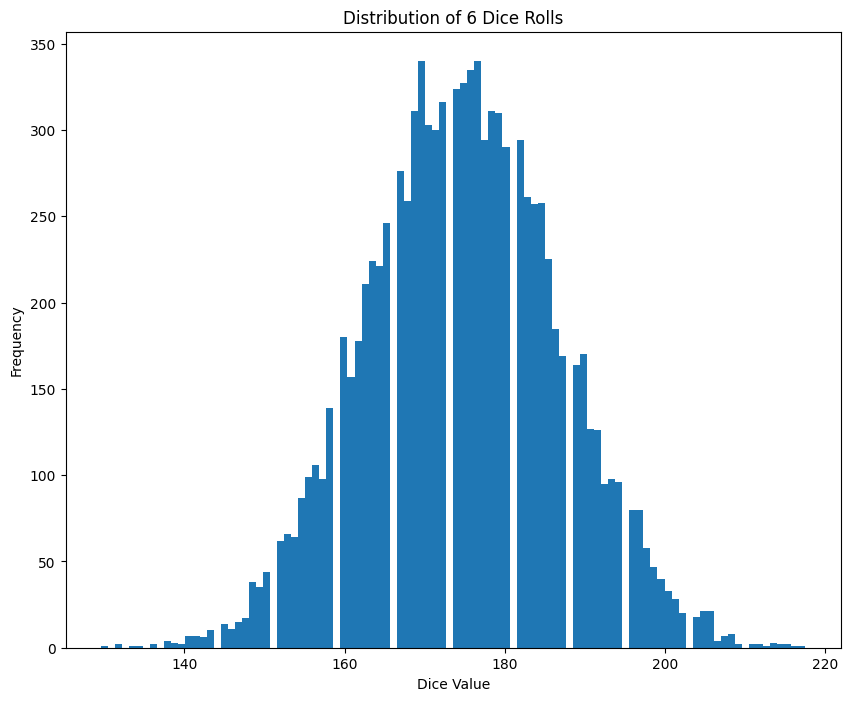

In [206]:
plt.figure(figsize=[10,8])
plt.hist(results, bins=100, align='left')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Distribution of 6 Dice Rolls')
plt.show()

var = np.var(results)
std = np.std(results)
mean = np.mean(results)

In [207]:
for i in range(n):
    results_normalised[i] = (results[i]-mean) / std

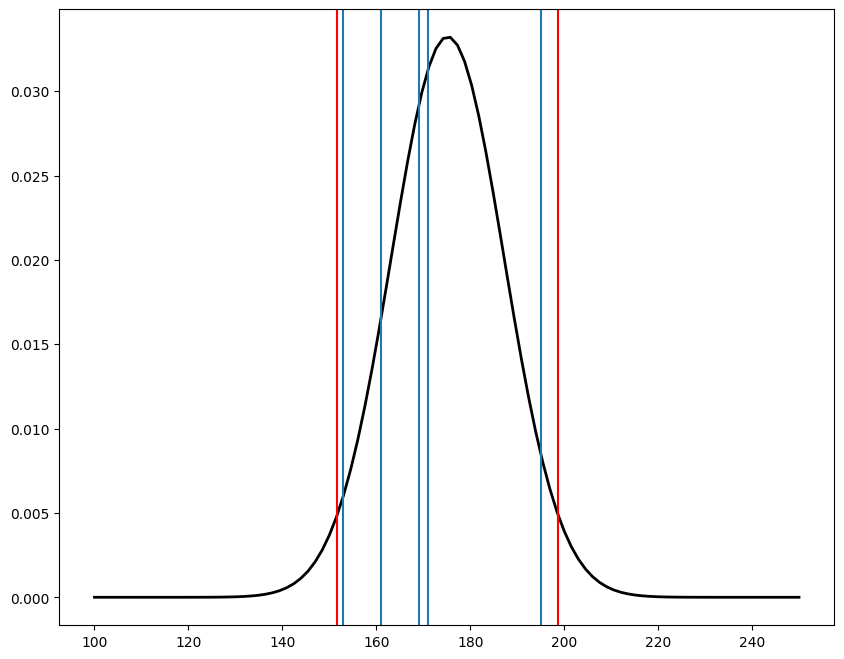

In [228]:
from scipy.stats import norm

plt.figure(figsize=[10,8])
x = np.linspace(100, 250 , 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
plt.axvline(mean - (1.96 * std), color="red")
plt.axvline(mean + (1.96 * std), color="red")



for i in range(5) : 
    plt.axvline(results[rand.randint(1,n)])


In [226]:
print(var)
print(std)
print(mean)

144.13549695999998
12.00564437920764
175.1952
